<div class="alert alert-block alert-info">

#**CLASS 06 - LINEAR TEMPORAL LOGIC (LTL) - PART IV**
**Learning Objectives:**
*   Reviewing of Kripke Structures
*   Reviewing of Model Checking in LTL
*   Advanced Model Checking in PL/LTL
</div>


**KRIPKE STRUCTURES REVIEW**

A Kripke structure is a **directed graph**, equipped with a set of initial nodes, such that **every node** is source of some edge and it **is labeled by a set of atomic propositions**. The nodes of Kripke structure are called states:

A Kripke structure is a tuple (𝑆,𝑆0,𝑅,𝐿) such that:

* 𝑆 is a finite set of states
* 𝑆0⊆𝑆 is a set of initial states
* 𝑅⊆𝑆×𝑆 is a set of transitions such that for all 𝑠∈𝑆 there exists a (𝑠,𝑠′)∈𝑅 for some 𝑠′∈𝑆
* 𝐿:𝑆→2^{AP} maps each state into a set of atomic propositions. Sometimes, the set of initial states is omitted. In such cases, 𝑆 and 𝑆0 coincide.

A computation of a Kripke structure (𝑆,𝑆0,𝑅,𝐿) is an infinite path of (𝑆,𝑅) that starts from some 𝑠∈𝑆0. In the following code we are specifying a Kripke structure using the Python module pyModelChecking.

In [1]:
!pip install pyModelChecking

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 5.2 MB/s eta 0:00:00


In [2]:
from pyModelChecking import Kripke

K=Kripke(S=[0,1,2], S0=[0], R=[(0,1),(1,2),(2,2)], L={0: set(['p']), 1:set(['p','q']), 2: set([''])})

**SEMANTICS REVIEW**

If 𝐾 is a Kripke structure, 𝑠 one of its states, and 𝜑 a propositional formula, we write 𝐾,𝑠⊨𝜑 (to be read “𝐾 and 𝑠 satisfy 𝜑 ”) meaning that 𝜑 holds at state 𝑠 in 𝐾.

Let 𝐾 be the Kripke structure (𝑆,𝑆0,𝑅,𝐿); the relation ⊨ is defined recursively as follows:

* 𝐾,𝑠⊨⊤ and 𝐾,𝑠⊭⊥ for any state 𝑠∈𝑆
* if 𝑝∈𝐴𝑃, then 𝐾,𝑠⊨𝑝 ⟺ 𝑝∈𝐿(𝑠)
* 𝐾,𝑠⊨¬𝜑 ⟺ 𝐾,𝑠⊭𝜑
* 𝐾,𝑠⊨𝜑1∧𝜑2 ⟺ 𝐾,𝑠⊨𝜑1 and 𝐾,𝑠⊨𝜑2
* 𝐾,𝑠⊨𝜑1∨𝜑2 ⟺ 𝐾,𝑠⊨𝜑1 or 𝐾,𝑠⊨𝜑2
* 𝐾,𝑠⊨𝜑1→𝜑2 ⟺ 𝐾,𝑠⊭𝜑1 or 𝐾,𝑠⊨𝜑2

**MODEL CHECKING REVIEW**

Model checking is a technique to establish the set of states in Kripke structure that satisfy a given temporal formula. More formally, provided a Kripke structure 𝐾=(𝑆,𝑆0,𝑅,𝐿) and a temporal formula 𝜑, model checking aims to identify 𝑆′⊆𝑆 such that 𝐾,𝑠𝑖⊨𝜑 for all 𝑠𝑖∈𝑆′.


In [4]:
from pyModelChecking import *
from pyModelChecking.LTL import *

K=Kripke(R=[(0,0),(0,1),(1,2),(2,2),(3,3)], L={0: set(['p']), 1:set(['p','q']),3:set(['p'])})
modelcheck(K,'A (not q)')

{0, 2, 3}

**ADVANCED PL/LTL MODEL CHECKING**

pyModelChecking provides a user friendly support for building CTL*, CTL and LTL formulas. Each of these languages corresponds to a pyModelChecking’s sub-module which implements all the classes required to encode the corresponding formulas.

Propositional logic is also supported by pyModelChecking as a shared basis for all the possible temporal logics.

Propositional logics support is provided by including the pyModelChecking.language sub-module. This sub-module allows to represents atomic propositions and Boolean values through the pyModelChecking.formula.AtomicProposition and pyModelChecking.formula.Bool classes, respectively.

In [ ]:
from pyModelChecking.PL import *
print(AtomicProposition('p'))
print(Bool(True))
print(And('p', True))
print(And('p', True, 'p'))

p
true
(p and true)
(p and true and p)


In [ ]:
f = Imply('q','p')
print(And('p', f, Imply(Not(f), Or('q','s', f))))

(p and (q --> p) and (not (q --> p) --> (q or s or (q --> p))))


In [ ]:
f = 'p' & Bool(True)
~('p' & Bool(True)) | And(~f,'b')

(not (p and true) or (not (p and true) and b))

The module pyModelChecking.PL also provides a parsing class pyModelChecking.PL.Parser for propositional formula. Its objects read a formula from a string and, when it is possible, translate it into the corresponding pyModelChecking.PL.Formula objects.

In [ ]:
p = Parser()
p('(~p and q) --> ((q | p))')

((not p and q) --> (q or p))

A complete description of the parser grammar is contained in class attribute pyModelChecking.PL.Parser.grammar:

In [ ]:
print(p.grammar)


        s_formula: "true"     -> true
                 | "false"    -> false
                 | a_prop
                 | "(" s_formula ")"

        u_formula: ("not"|"~") u_formula  -> not_formula
                 | "(" b_formula ")"
                 | s_formula

        b_formula: u_formula
                 | u_formula ( ("or"|"|") u_formula )+ -> or_formula
                 | u_formula ( ("and"|"&") u_formula )+ -> and_formula
                 | u_formula ("-->") u_formula -> imply_formula

        a_prop: /[a-zA-Z_][a-zA-Z_0-9]*/ -> string
              | ESCAPED_STRING           -> e_string

        formula: b_formula

        %import common.ESCAPED_STRING
        %import common.WS
        %ignore WS
        


**EXERCISE 1**

Reactive systems are examples of systems that can be modeled by Kripke Structures. Consider, for instance, a lamp. Model a lamp as Kripke Structure and check some tests.

In [ ]:
#TYPE YOUR IMPLEMENTATION HERE

K=Kripke(S=[0,1],
        S0=[0],
        R=[(0,0),(0,1),(1,1),(1,0)],
        L={0: set(['desligada']), 1: set(['ligada'])})

modelcheck(K, 'A (desligada --> desligada)')

{0, 1}

**EXERCISE 2**

Model the AND DIGITAL PORT as a Kripke Structure and check some tests.

In [6]:
#TYPE YOUR IMPLEMENTATION HERE

K=Kripke(S=[0,1,2,3],
        S0=[0],
        R=[(0,0),(1,1),(2,2), (3,3)],
        L={0: set(['zero']), 1: set(['zero']), 2: set(['zero']), 3: set(['um'])})

modelcheck(K, 'A (zero)')

{0, 1, 2}

**EXERCISE 3**

Model a semaphore (GREEN, YELLOW and RED) as a Kripke Structure and check some tests.

In [ ]:
#IMPLEMENT YOUR CODE HERE
K=Kripke(S=[0,1,2],
        S0=[0],
        R=[(0,0),(0,2),(1,1),(1,0),(2,2),(2,1)],
        L={0: set(['vermelho']), 1: set(['amarelo']), 2: set(['verde'])})

modelcheck(K, 'A (vermelho --> verde)')

{1, 2}

**EXERCISE 4**

Here we the famous arcade game River Raid. Model the player airplane as a Kripke Structure and check some tests.

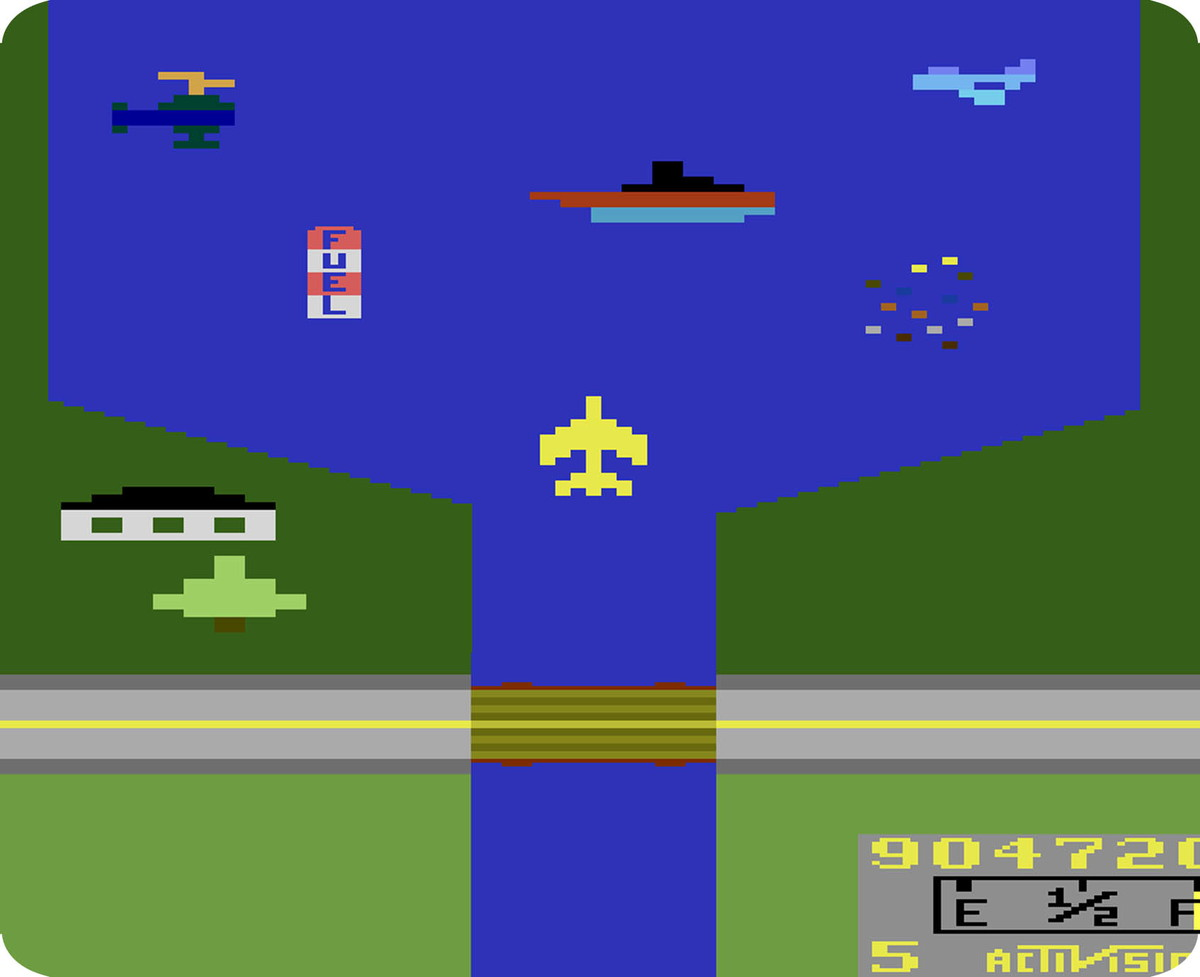

In [15]:
#PUT YOUR IMPLEMENATION HERE

K=Kripke(S=[0,1,2],
        S0=[0],
        R=[(0,0),(0,1),(1,0),(1,1),(1,2),(2,1),(2,0)],
        L={0: set(['parado']), 1: set(['voando']), 2: set(['atirando'])})

{2, 3}

### **HOMEWORK**

**EXERCISE 1**

Consider the arcade game Pac-Man. Model the pacman as a Kripke Structure and check some tests.

In [ ]:
#TYPE YOUR IMPLEMENTATION HERE
K=Kripke(S=[0,1,2,3],
        S0=[0],
        R=[(0,0),(0,1),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2),(2,3),(3,1),(3,2),(3,3)],
        L={0: set(['parado']), 1: set(['andando']), 2: set(['comendo']), 3: set(['powered'])})

modelcheck(K, 'A ((parado --> andando) and (andando --> parado))')

**EXERCISE 2**

Consider the arcade game Pac-Man. Model the ghosts as a Kripke Structure and check some tests.

    

In [18]:
#TYPE YOUR SOLUTION HERE


K=Kripke(S=[0,1,2],
        S0=[0],
        R=[(0,1),(1,1),(1,2),(2,0),(2,1),(2,2)],
        L={0: set(['parado']), 1: set(['cacando']), 2: set(['fugindo'])})

modelcheck(K, 'A (parado --> fugindo)')

{1, 2}